In [25]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [7]:
def creat_log_normal(data):
    """create theoretical log normal distribution with observed values"""
    s, loc, scale = ss.lognorm.fit(data)
    return ss.lognorm.rvs(s, loc, scale, size=len(data))

In [8]:
def compare_log_normal_with(data):
    """compare dists using histogram"""
    plt.figure(figsize=[12, 6], dpi=300)
    sns.kdeplot(x=creat_log_normal(data), shade=False, label='theoretical distribution')
    sns.kdeplot(x=data, shade=False, label='observed distribution')
    plt.legend()
    plt.show()
    return

In [15]:
def normalization(data, y):
    """apply normalization on observed data"""
    figure, axes = plt.subplots(nrows=2, ncols=2, figsize=[24, 8], dpi=300)
    transformed = np.log((data + 0.0001))
    axes = axes.ravel()

    sns.scatterplot(x=(data + 0.0001), y=y, label='before', ax=axes[0])
    axes[0].legend()
    sns.kdeplot(x=data, shade=True, label='before', ax=axes[1])
    axes[1].legend()
    sns.scatterplot(x=transformed, y=y, label='after', ax=axes[2])
    axes[2].legend()
    sns.kdeplot(x=transformed, shade=True, label='after', ax=axes[3])
    axes[3].legend()
    plt.show()
    return

In [23]:
def quantile_quantile_plot(data, dist):
    """create qq plot"""
    bins = np.linspace(0, 100, data.shape[0])
    std_norm = np.percentile(np.random.standard_normal(data.shape[0]), bins)
    input_data = np.percentile(data, bins)
    trans_input_data = np.percentile(np.log(data + 0.0001), bins)

    figure, axes = plt.subplots(nrows=1, ncols=2, figsize=[24, 8], dpi=300)
    axes = axes.ravel()

    sns.regplot(x=std_norm, y=input_data, ax=axes[0])
    axes[0].set_xlabel('theoretical distribution')
    axes[0].set_ylabel('observed distribution')

    sns.regplot(x=std_norm, y=trans_input_data, ax=axes[1])
    axes[1].set_xlabel('theoretical distribution')
    axes[1].set_ylabel('observed distribution')
    plt.show()
    return

In [13]:
tb_cont_data = pd.read_csv('../../data/train.csv', index_col='id')
tb_cont_data = tb_cont_data.loc[:, 'cont0':'target']
tb_cont_data

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,
1,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,0.260716,0.712438,0.161661,0.442794,0.768447,0.269578,0.258655,0.363598,0.300619,0.340516,0.235711,0.383477,0.215227,0.793630,8.343538
499996,0.173302,0.121591,0.592514,0.193711,0.775951,0.197211,0.257024,0.574304,0.227035,0.322583,0.286094,0.324874,0.306933,0.230902,7.851861
499997,0.342856,0.617869,0.462991,0.418098,0.297406,0.449482,0.386172,0.476217,0.135947,0.502730,0.235788,0.316671,0.250286,0.349041,7.600558


### cont 0

In [32]:
scaler = MinMaxScaler()
cont_0 = scaler.fit_transform(np.asarray(tb_cont_data['cont0']).reshape(-1,1))
cont_0 = cont_0.reshape(1,-1)[0]
cont_0

array([0.88703657, 0.4633973 , 0.72041054, ..., 0.38071182, 0.60454153,
       0.4963974 ])

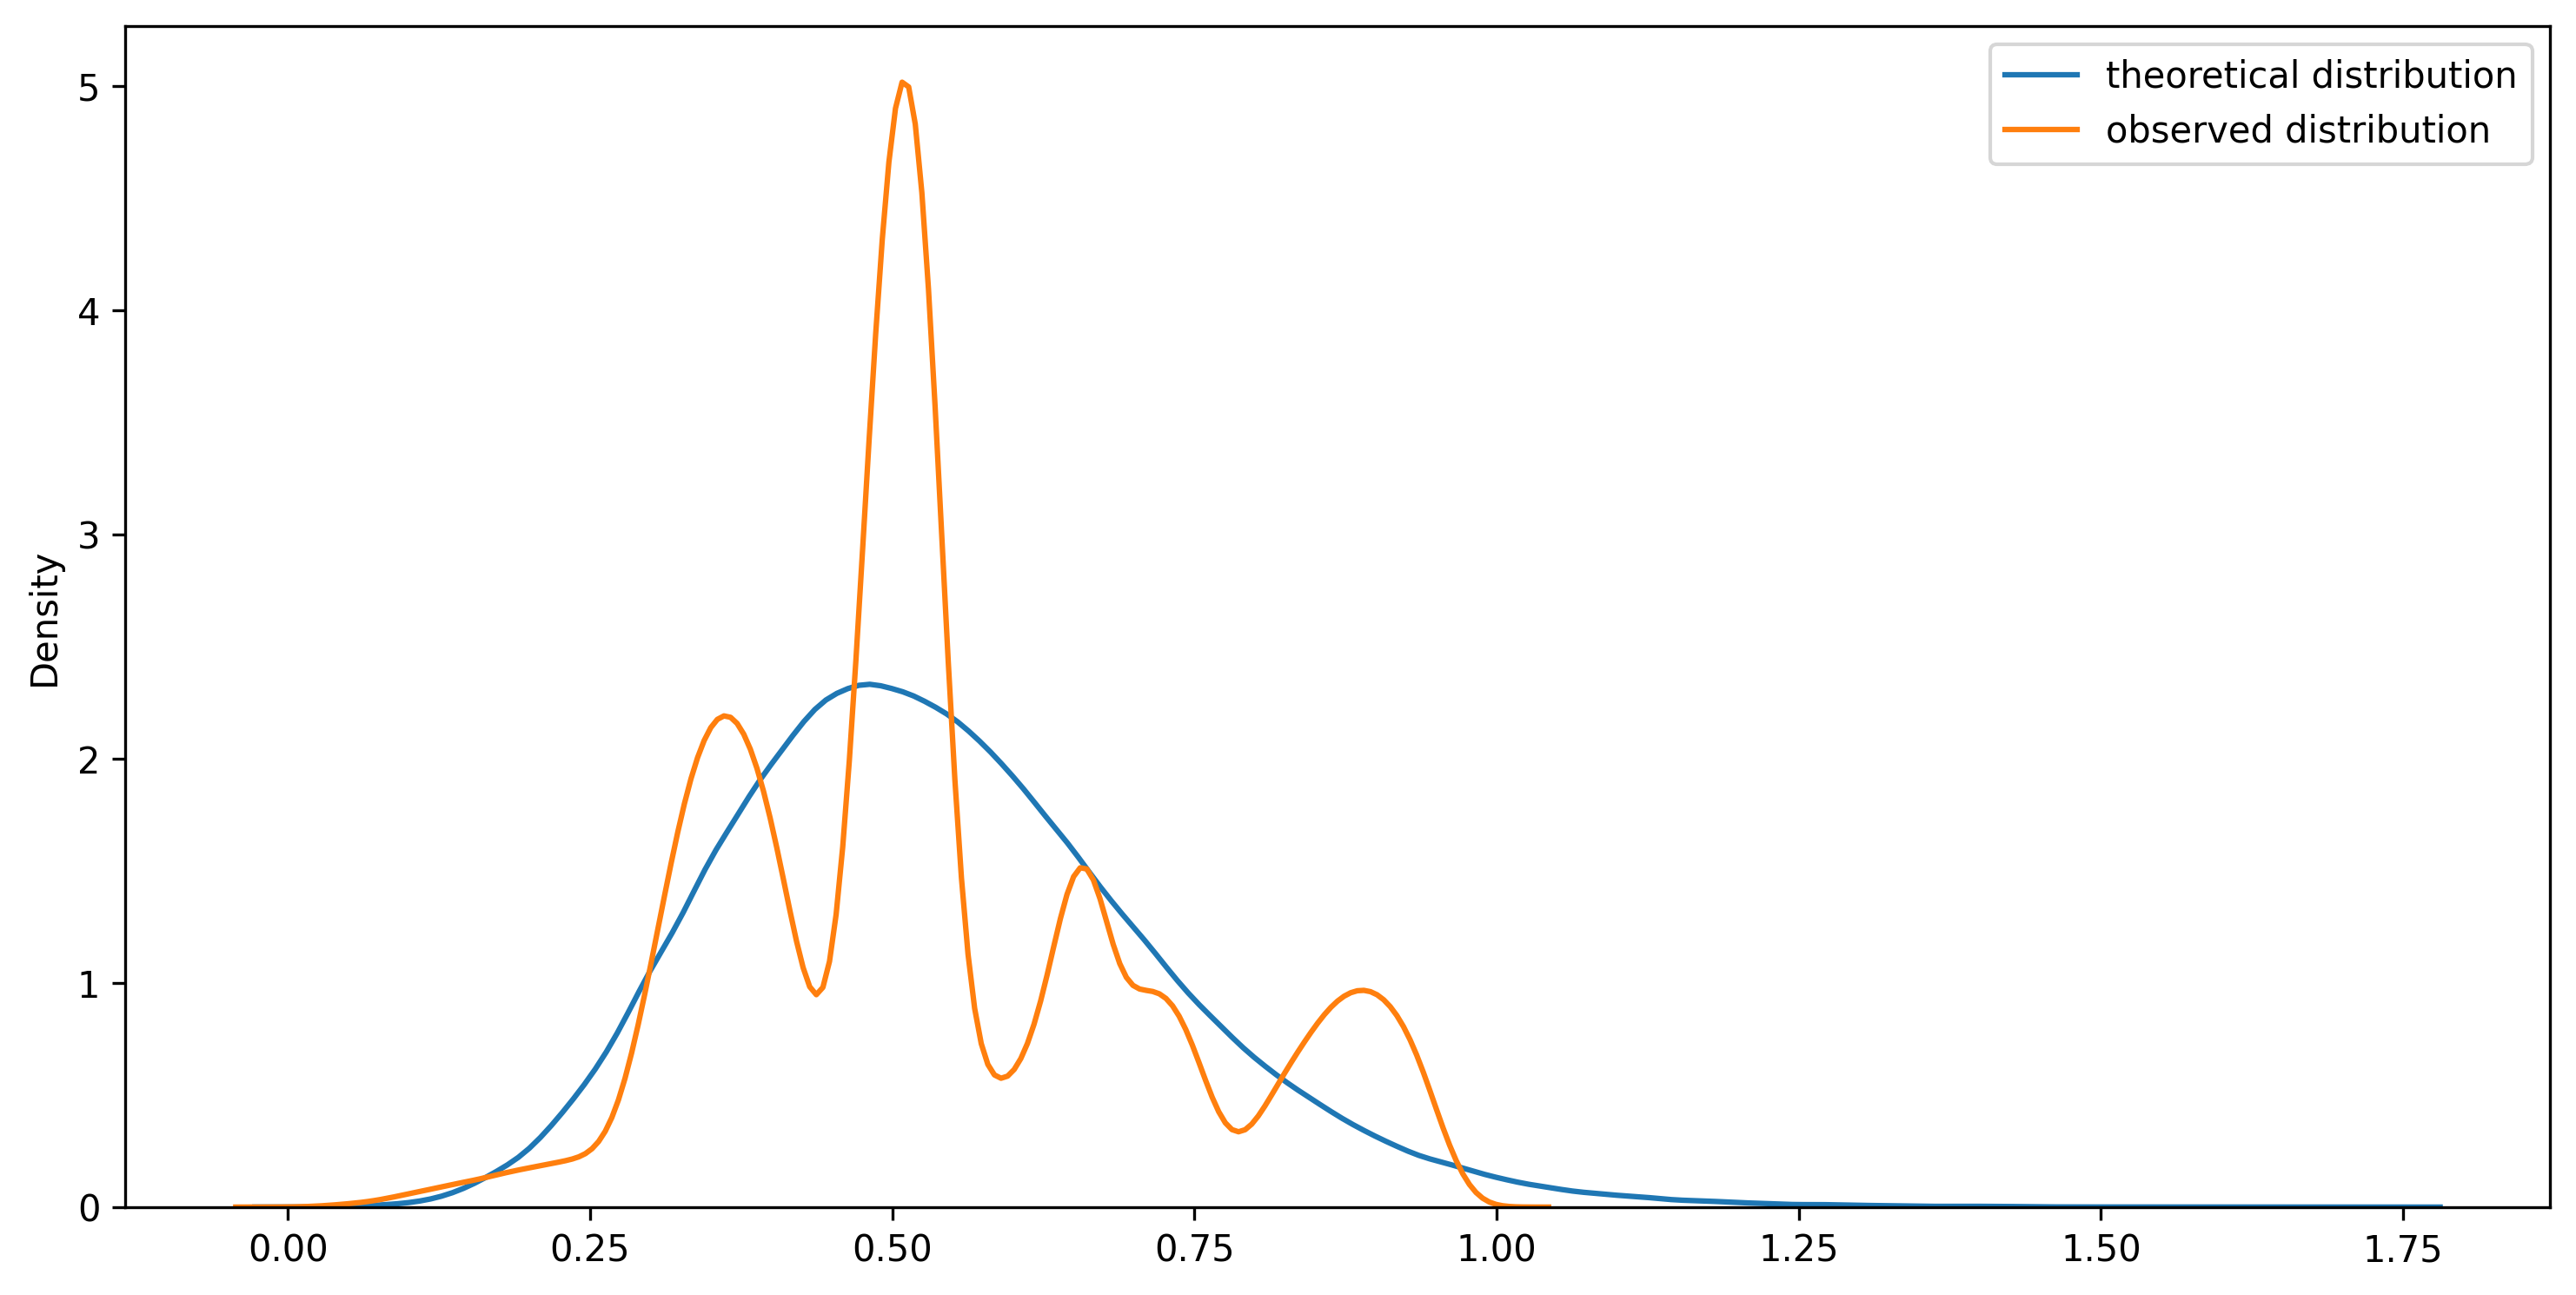

In [33]:
compare_log_normal_with(cont_0)

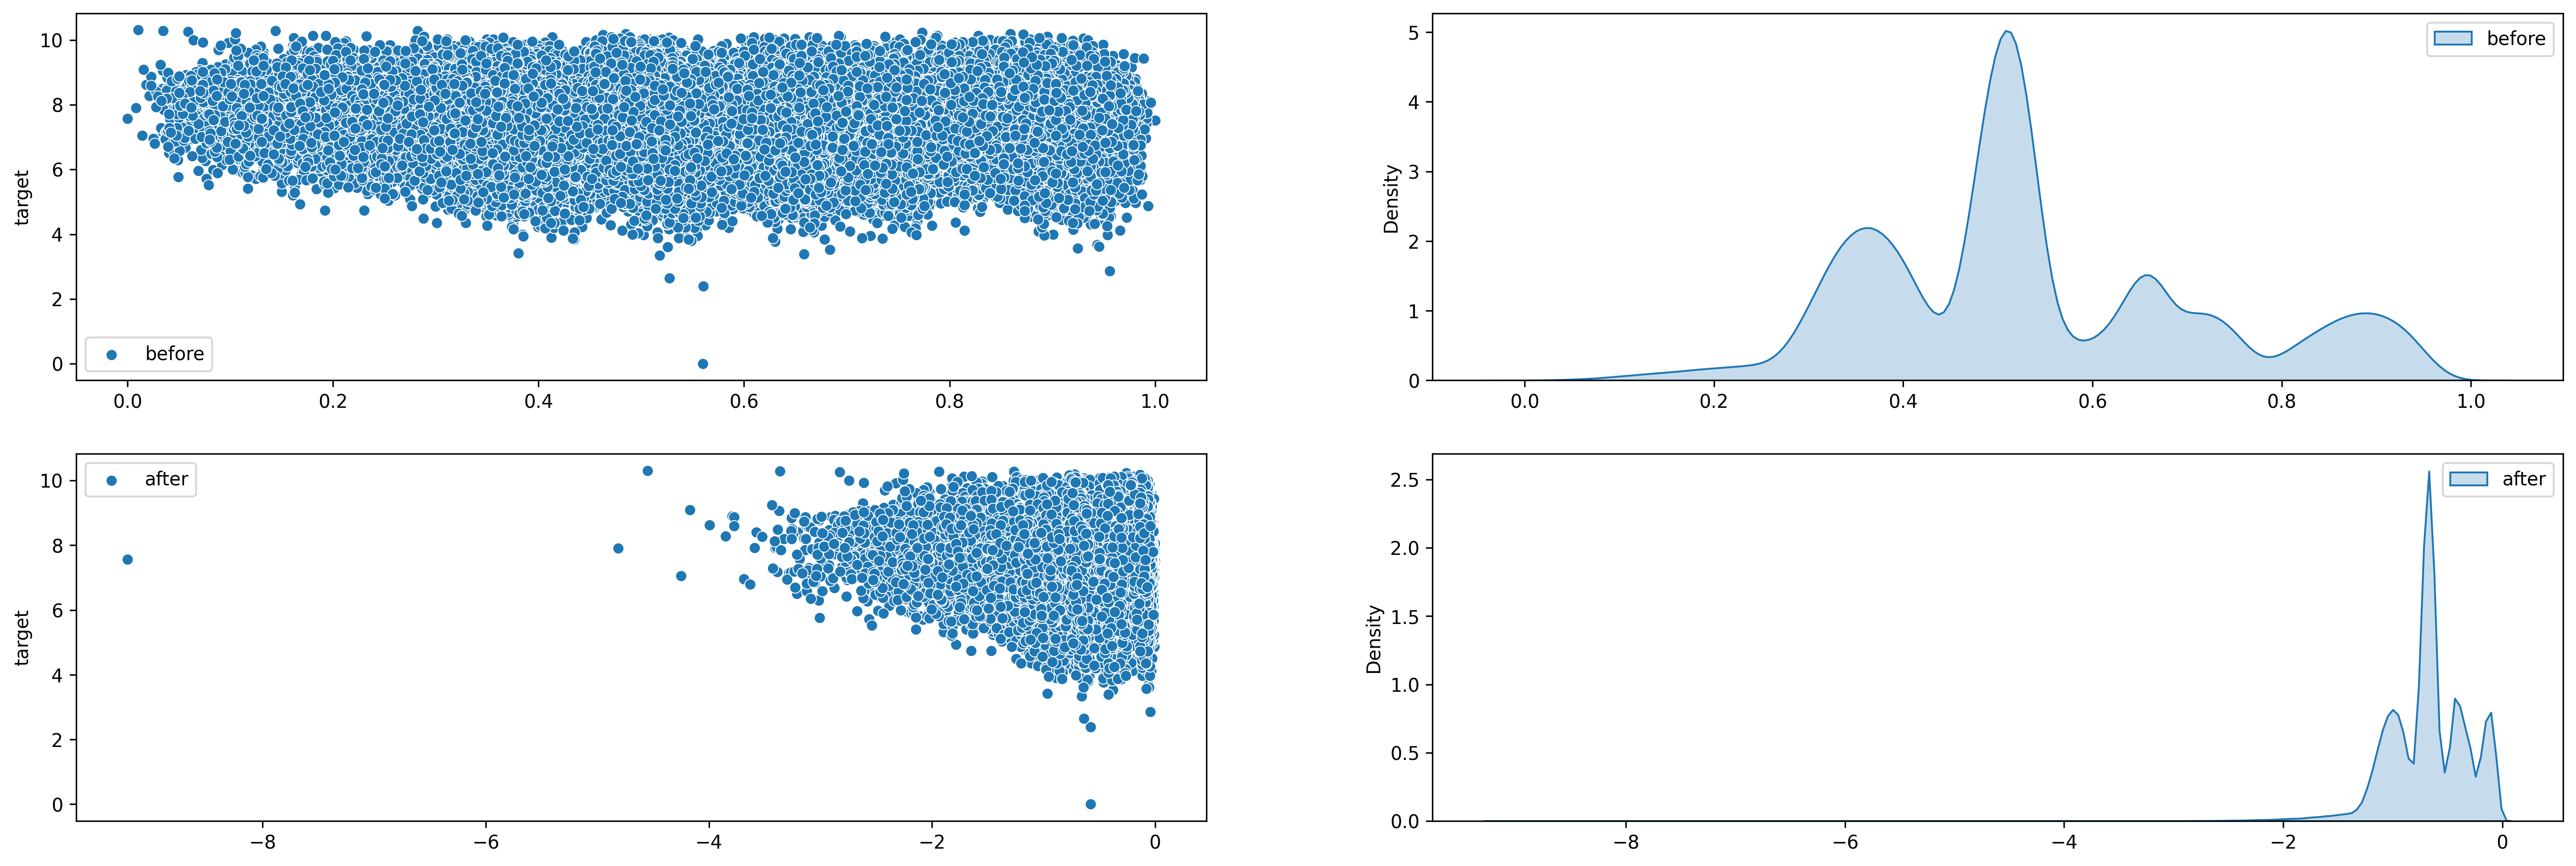

In [34]:
normalization(cont_0, tb_cont_data['target'])

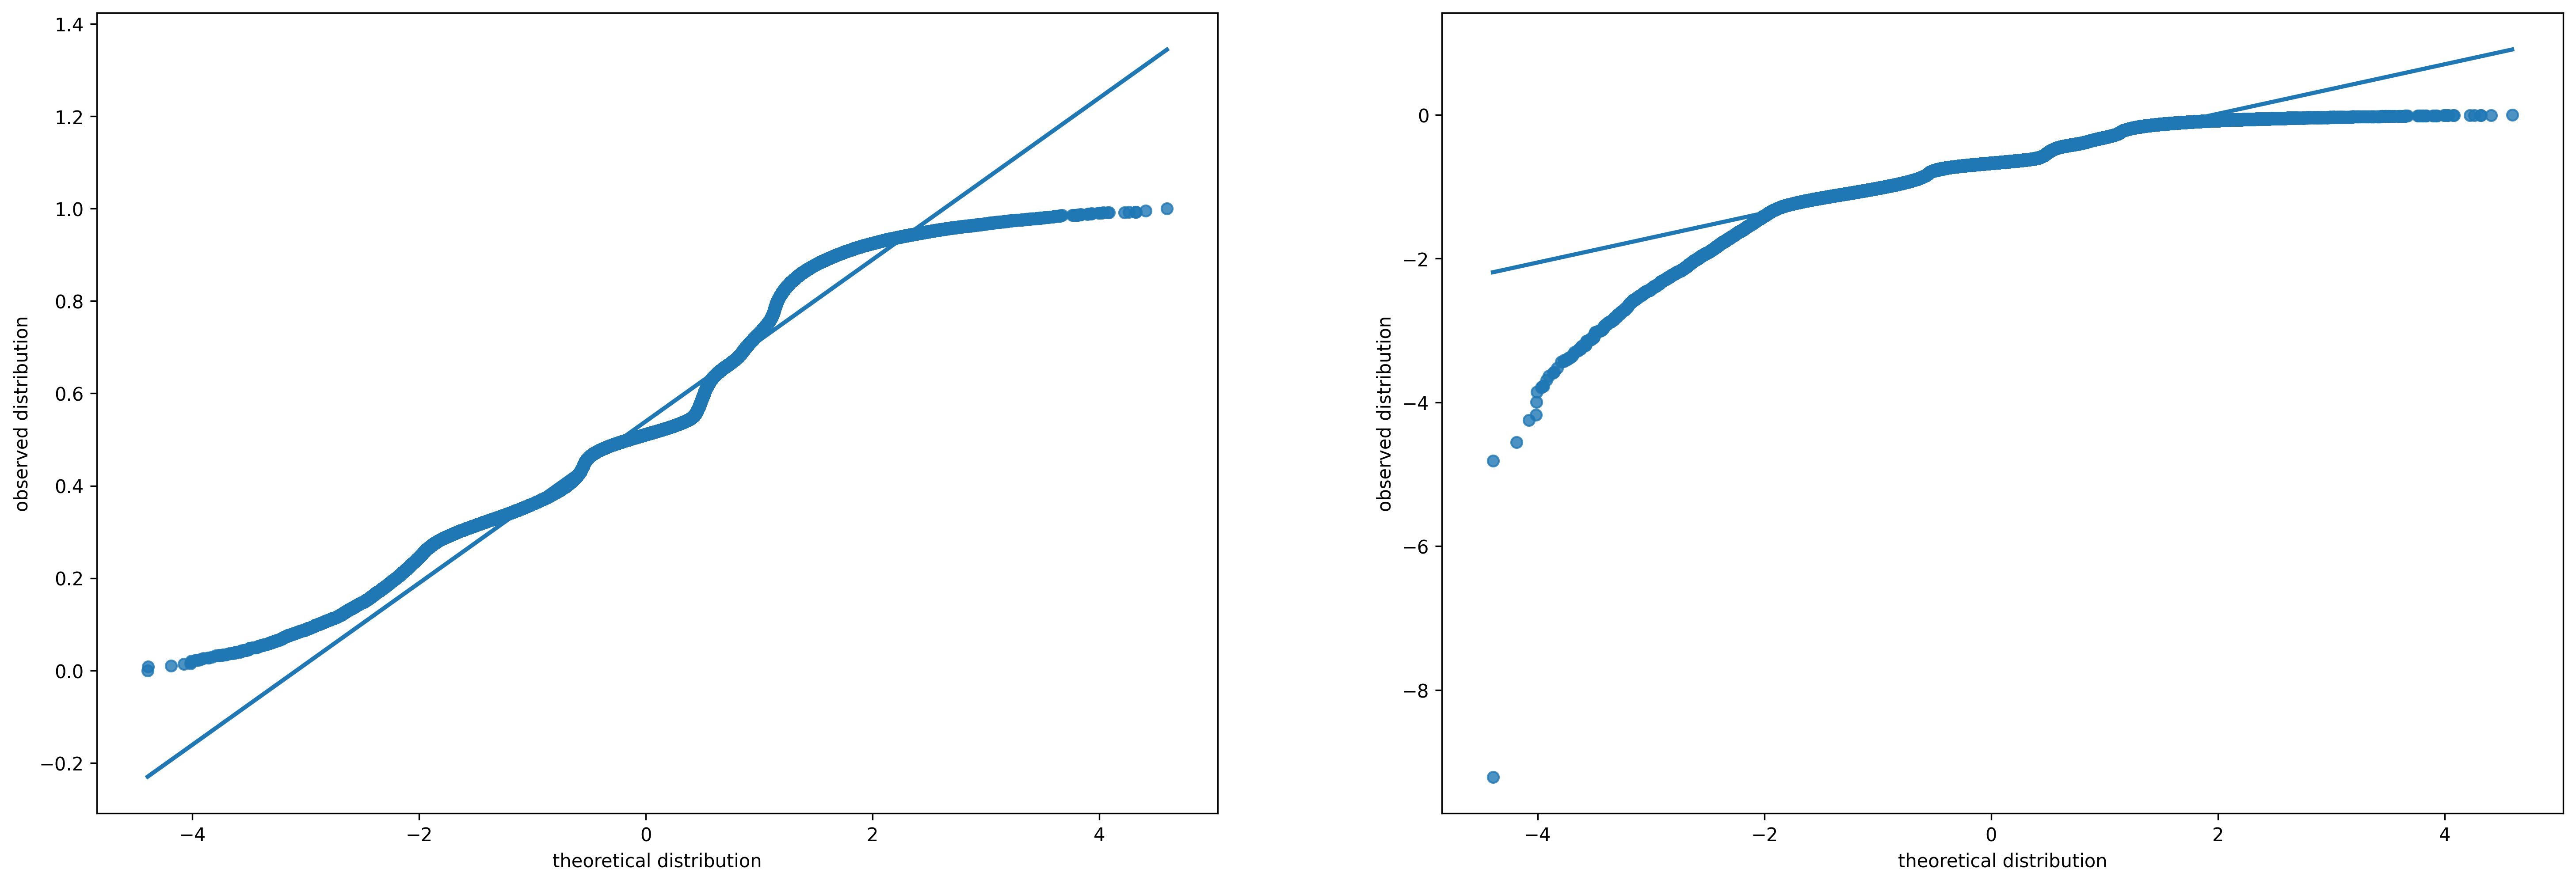

In [35]:
quantile_quantile_plot(cont_0, tb_cont_data['target'])